In [1]:
from gibbs import *
from data_simu import *
from mcmc_plot import *
from geweke_full import *

## 1.Simulate Data

I simulate the data according to 

$$X= WZ + \sigma^2 I_n$$
where 

 1. $\sigma^2$ is a scalar for the noise parameter
 2. $(Z_i)_{qx1} \sim N(0, I_q)$ is the principle component vector for i-th observation
 3. $(\alpha_j)_{}$ is the precision vector parameter for $W$ matrix
 4. $(W_j)_{dx1} \sim N(0, v_jI_d)$ is the j-th column of $W$ projection matrix

In the following simualation, I chose d = 5, q_star = 1, meaning there is only one important component driving 5 dimensional data $X$

In [2]:
# data dimension
d = 5
# true component dimension
q_star = d-1
# sample size
n_sample = 1000
# true sigma2
sigma2_star = 1
# true component variance parameter
a_star_list = 1 / np.linspace(1,10,q_star)

In [3]:
X = generate_data(d, q_star, n_sample, sigma2_star, a_star_list)

Text(0, 0.5, 'Component j')

<Figure size 720x432 with 0 Axes>

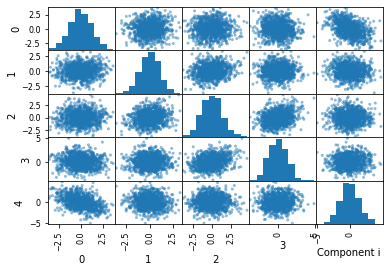

In [4]:
plt.figure(figsize=(10,6))
pd.plotting.scatter_matrix(pd.DataFrame(X).T)
plt.xlabel('Component i')
plt.ylabel('Component j')

In [5]:
def component_posterior(comp_index, W_list, Z_list):
    """
        Function to plot the component residuals
        param: comp_index. list of compoents indexs used to restore the original data X
    """
    x_list=[]
    for sub_chains in range(n_chains):

        for iters in range(len(W_list[sub_chains])):
            y_hat = np.dot(W_list[sub_chains][iters][:,comp_index].reshape([d,len(comp_index)]), Z_list[sub_chains][iters][comp_index,:].reshape([len(comp_index),n_sample]))

            x_list.append(X-y_hat)
    return x_list

## 2. Geweke Test

### 2.1 Geweke Test Setup

I simulate the data generating process iteration(500) tims and sample mcmc iteration(500) times to calcualte some statistics on the data X. The mcmc sample was thined by draw 1 sample evert 50 times

In [6]:
q = d-1
a_vj = 0.5 * d * np.ones(q) + 1
epislon = 0.1

prior_param = dict({'beta_sigma2': 2,
                        'a_sigma2': 3,
                        'a_vj': a_vj,
                        'beta_vj': epislon * (a_vj - 1)
                        })

init_dict = dict({'Z0': np.random.normal(0, 1, [q, 1]),
                      "sigma20": np.random.gamma(3, 0.1),
                      "w0": np.random.normal(0, 1, [d, q]),
                      "v0": np.random.gamma(1, 2, d - 1)})   


iterations = 500
n_sample = 100
thin = 50

### 2.2 Geweke Result --- PP plot, density plot and autocorrelation plot

true sigma2_star is0.3293330815636476
true sigma2_star is0.6959205407595828
true sigma2_star is0.29963198690879617
true sigma2_star is0.4215063362077807
true sigma2_star is0.4655431760881762
true sigma2_star is0.9297874851131291
true sigma2_star is0.48019349922959503
true sigma2_star is1.5439702685116679
true sigma2_star is9.522371347413292
true sigma2_star is0.7308975784727663
true sigma2_star is0.31497437929744626
true sigma2_star is1.320864167646765
true sigma2_star is0.7817130229937999
true sigma2_star is1.150225442845476
true sigma2_star is0.35489461162413555
true sigma2_star is1.4195885823983305
true sigma2_star is1.8213437078481236
true sigma2_star is0.44535447733788464
true sigma2_star is0.5299662167925914
true sigma2_star is0.9862483328750107
true sigma2_star is0.5381674895503966
true sigma2_star is1.0473228166843644
true sigma2_star is0.24855558991427942
true sigma2_star is0.5397779310782046
true sigma2_star is0.7154873059991793
true sigma2_star is0.5526536122135872
true sigm

true sigma2_star is2.2281471045601027
true sigma2_star is0.624819477268917
true sigma2_star is3.8188452839191402
true sigma2_star is1.5239354604520532
true sigma2_star is0.7174757145566433
true sigma2_star is1.5255122832097079
true sigma2_star is0.4788156868033365
true sigma2_star is0.33962219835057095
true sigma2_star is1.7984625483014345
true sigma2_star is1.470961156961257
true sigma2_star is3.3040337419011383
true sigma2_star is1.356102601384417
true sigma2_star is0.5490051961980219
true sigma2_star is0.8691226818546384
true sigma2_star is1.1917914337489552
true sigma2_star is0.36680057327651394
true sigma2_star is1.10641399837686
true sigma2_star is1.2258074246324082
true sigma2_star is0.6028431408559554
true sigma2_star is0.5815614601245772
true sigma2_star is0.935113212519929
true sigma2_star is0.37058214010024637
true sigma2_star is0.6153806466467804
true sigma2_star is1.2193891695931587
true sigma2_star is0.4077875559006453
true sigma2_star is0.8300431640739876
true sigma2_sta

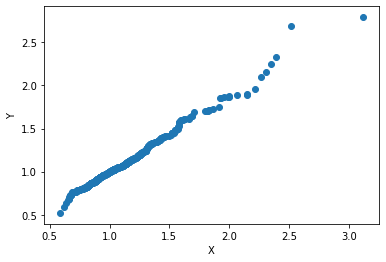

1.0195768753765508


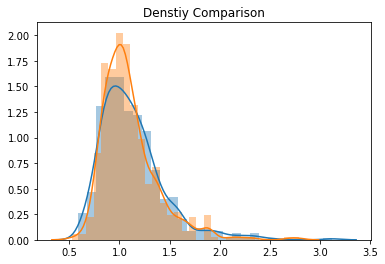

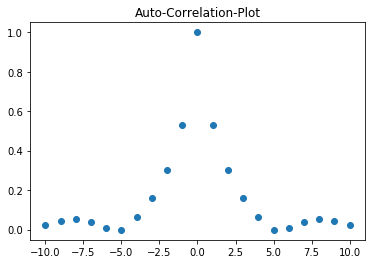

In [7]:
forward_results, gibbs_results = geweke(iterations, d, q_star, prior_param, init_dict, n_sample, thining= thin)

plt.scatter(np.sort(np.array(forward_results)),
            np.sort(np.array(gibbs_results)))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


print(np.mean(np.array(forward_results)) / np.mean(gibbs_results))


sns.distplot(np.array(forward_results))
sns.distplot(np.array(gibbs_results))
plt.title('Denstiy Comparison')
plt.show()

a = gibbs_results
b = np.mean(gibbs_results)
plt.acorr(a - b, normed=True, usevlines=False, maxlags=10, label=u'thinned')
plt.title('Auto-Correlation-Plot')
plt.show()

## 3. Gibbs Sampling

In [8]:
d = 5
# true component dimension
q_star = 1
# sample size
n_sample = 1000
# sigma2 and vj setup are different from the prior of mcmc

a_vj = 0.5 * d * np.ones(q_star) + 1
epislon = 2

prior_param_true = dict({'beta_sigma2': 0.6,
                        'a_sigma2': 3,
                        'a_vj': a_vj,
                        'beta_vj': epislon * (a_vj - 1)
                        })




In [9]:
sample_result = forward_sample(d, q_star, n_sample, prior_param_true)
X = sample_result[0]

true sigma2_star is0.2769016159219941


### 3.1 Prior Parameter Setup

Mean of true sigma2 0.29188935350242085


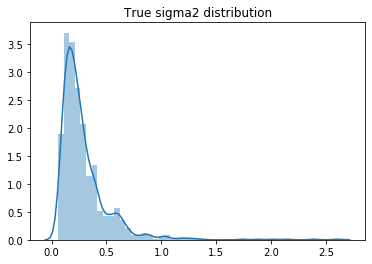

In [10]:
q = d-1
a_vj = 0.5 * d * np.ones(q) + 1
epislon = 0.1
xi = 0.3
prior_param_mcmc = dict({'beta_sigma2': 0.6,
                        'a_sigma2': 3,
                        'a_vj': a_vj,
                        'beta_vj': epislon * (a_vj - 1)
                        })

#prior_param_standard = dict({'beta_sigma2': 1/xi * prior_param_mcmc['a_sigma2']*(prior_param_mcmc['a_sigma2']+1) /prior_param_mcmc['beta_sigma2'],
#                        'a_sigma2': prior_param_mcmc['a_sigma2']+2,
#                        'a_vj': a_vj,
#                        'beta_vj': epislon * (a_vj - 1)
#                        })

prior_param_standard = dict({'beta_sigma2':1/ xi * prior_param_mcmc['beta_sigma2'],
                        'a_sigma2': prior_param_mcmc['a_sigma2'],
#                'beta_sigma2':10000,
#    'a_sigma2': 20000,
                        'a_vj': a_vj,
                        'beta_vj': epislon * (a_vj - 1)
                        })


true_sigma2_sample = 1/np.random.gamma(prior_param_true['a_sigma2'], 1/ prior_param_true['beta_sigma2'], 1000 )
sns.distplot(true_sigma2_sample)
plt.title('True sigma2 distribution')
print('Mean of true sigma2 '+ str(np.mean(true_sigma2_sample)))

### 3.2 Inference Parameter Setup

In [11]:
iterations = 2000
n_chains = 4

### 3.3 Inference Sampling standard

In [12]:
mcmc_list = []
for sub_chains in range(n_chains):    
    init_dict = dict({'Z0': np.random.normal(0, 1, [q, 1]),
                      "sigma20": np.random.gamma(prior_param_standard['a_sigma2'], 1/prior_param_standard['beta_sigma2']),
#                      "sigma20": np.random.gamma(3, 0.1),
                      "w0": np.random.normal(0, 1, [d, q]),
                      "v0": np.random.gamma(1, 2, d - 1)})   
                      
    inference = Model(X, init_dict, iterations, q, prior_param_standard, xi = 1)                      
    mcmc_list.append(inference.gibbs_result())

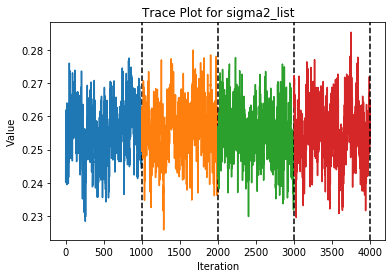

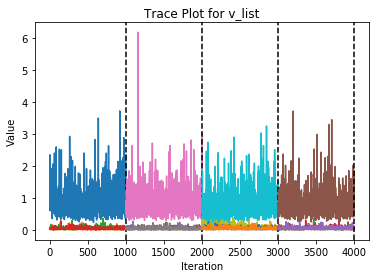

In [13]:
var_list = ['sigma2_list', 'v_list']
trace_plot(mcmc_list, var_list)

In [14]:
sigma2_list = get_trace_list(mcmc_list, 'sigma2_list')
Z_list = get_trace_list(mcmc_list, 'Z_list')
W_list = get_trace_list(mcmc_list, 'W_list')
v_list = get_trace_list(mcmc_list, 'v_list')

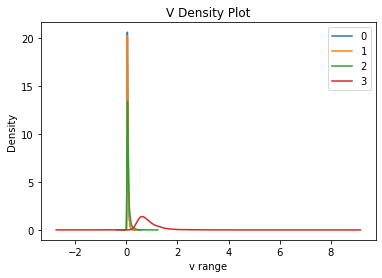

In [15]:
v_table = plot_v_density(v_list)

In [16]:
np.mean(v_list, axis=1)

array([[0.87807935, 0.05640008, 0.06632803, 0.05790245],
       [0.05587681, 0.0567451 , 0.86586019, 0.05666421],
       [0.13860711, 0.80252112, 0.05879692, 0.05687081],
       [0.05738471, 0.06258127, 0.0604246 , 0.84039641]])

In [17]:
print('Inference v' + str(v_table.mean().values))

print('True v'+ str(prior_param_true['beta_vj']/prior_param_true['a_vj']))

Inference v[0.0566331  0.05844705 0.08106538 0.84671427]
True v[1.42857143]


### 3.4 Inference Sampling Approxmiate

In [18]:
mcmc_list = []
for sub_chains in range(n_chains):    
    init_dict = dict({'Z0': np.random.normal(0, 1, [q, 1]),
                      "sigma20": np.random.gamma(prior_param_mcmc['a_sigma2'], 1/prior_param_mcmc['beta_sigma2']),                      
#                      "sigma20": np.random.gamma(3, 0.1),
                      "w0": np.random.normal(0, 1, [d, q]),
                      "v0": np.random.gamma(1, 2, d - 1)})   
                      
    inference = Model(X, init_dict, iterations, q, prior_param_mcmc, xi = xi)                      
    mcmc_list.append(inference.gibbs_result())

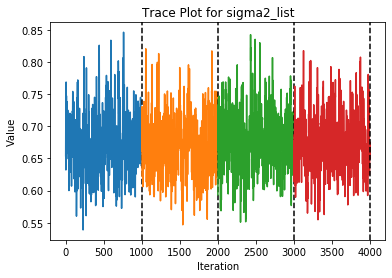

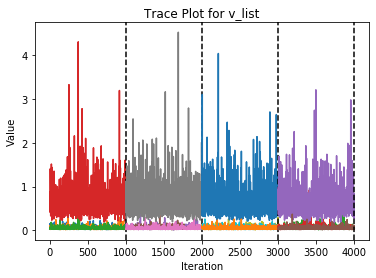

In [19]:
var_list = ['sigma2_list', 'v_list']
trace_plot(mcmc_list, var_list)

In [20]:
sigma2_list = get_trace_list(mcmc_list, 'sigma2_list')
Z_list = get_trace_list(mcmc_list, 'Z_list')
W_list = get_trace_list(mcmc_list, 'W_list')
v_list = get_trace_list(mcmc_list, 'v_list')

array([[0.05966702, 0.05745512, 0.05746328, 0.65519816],
       [0.06146507, 0.05689305, 0.05574813, 0.67254259],
       [0.05904883, 0.05695992, 0.68514478, 0.05437388],
       [0.06347273, 0.06960336, 0.65481191, 0.0575697 ]])

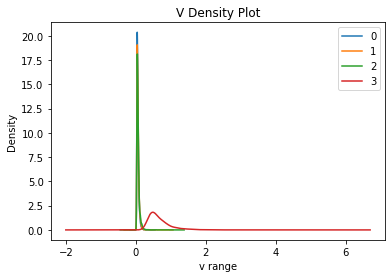

In [21]:
v_table = plot_v_density(v_list)
np.mean(v_list, axis=1)

In [22]:
print('Inference v' + str(v_table.mean().values))

print('True v'+ str(prior_param_true['beta_vj']/prior_param_true['a_vj']))

Inference v[0.0562867  0.05869724 0.06244607 0.66692436]
True v[1.42857143]


In [23]:
np.shape(sigma2_list)

(4, 1001)

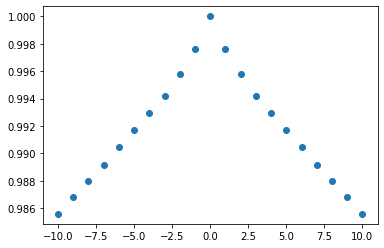

In [24]:
plt.acorr(sigma2_list[0], normed=True, usevlines=False, maxlags=10, label=u'thinned')
plt.show()